## Imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import random

## Generate data

In [2]:
def generate_3d_img(imgSize):
    x = np.random.choice([0, 1, 2], size=(imgSize, imgSize, imgSize))

    y = x.copy()
    y[y == 2] = 1
    
    return x, y

In [3]:
def generate_samples(num_samples, imgSize):
    testSet = num_samples
    testX = []
    testY = []
    for i in range(num_samples):
        x, y = generate_3d_img(imgSize)
        testX.append(x)
        testY.append(y)
        
    return np.array(testX), np.array(testY)

In [5]:
imgSize = 16
dataX, dataY = generate_samples(1000, imgSize)
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 1/10)

In [ ]:
dataX.shape

## Build the model

In [ ]:
epochs=50

model = keras.models.Sequential([
        keras.layers.Input((imgSize, imgSize, imgSize)),
        keras.layers.Flatten(),
        keras.layers.Dense(imgSize**3, activation="relu"),   
        keras.layers.Dense(imgSize**3, activation="sigmoid"),
        keras.layers.Reshape((imgSize, imgSize, imgSize)),
])

model.summary()

binary_accuracy = tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", threshold=0.5)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=binary_accuracy)

es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, min_delta=0.01, patience=20)
history = model.fit(x_train, y_train, batch_size=100, callbacks=[es], shuffle=True, epochs=epochs, validation_split=0.1) 


In [6]:
epochs=20

model = keras.models.Sequential()
model.add(keras.layers.Input((imgSize, imgSize, imgSize, 1)))
model.add(keras.layers.Conv3D(32, (3, 3, 3), activation='relu'))
model.add(keras.layers.Conv3DTranspose(1, (3, 3, 3), activation='sigmoid'))

model.summary()

binary_accuracy = tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", threshold=0.5)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=binary_accuracy)

es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, min_delta=0.01, patience=20)
history = model.fit(x_train, y_train, batch_size=100, callbacks=[es], shuffle=True, epochs=epochs, validation_split=0.1) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 14, 14, 14, 32)    896       
                                                                 
 conv3d_transpose (Conv3DTra  (None, 16, 16, 16, 1)    865       
 nspose)                                                         
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - 5s 300ms/step - loss: 0.6766 - binary_accuracy: 0.5617 - val_loss: 0.6295 - val_binary_accuracy: 0.6660
Epoch 2/20
9/9 [==============================] - 2s 266ms/step - loss: 0.6152 - binary_accuracy: 0.6667 - val_loss: 0.5802 - val_binary_accuracy: 0.6739
Epoch 3/20
9/9 [==============================] - 2s 250ms/step - loss: 0.55

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

print(x_test[0])
print(y_test[0])
prediction = model.predict(x_test).round().astype(int)
print(prediction[0])

Test loss: 0.08502603322267532
Test accuracy: 0.9926660060882568
[[[1 2 0 ... 1 1 1]
  [1 0 0 ... 2 0 2]
  [2 1 1 ... 2 2 2]
  ...
  [1 2 1 ... 0 2 0]
  [0 2 2 ... 1 1 1]
  [2 2 1 ... 2 2 1]]

 [[0 0 2 ... 1 2 2]
  [0 2 2 ... 2 1 0]
  [1 0 0 ... 1 1 1]
  ...
  [2 0 0 ... 2 1 0]
  [0 0 1 ... 0 1 1]
  [2 1 0 ... 0 1 0]]

 [[2 2 1 ... 0 1 0]
  [0 2 0 ... 1 0 0]
  [1 1 1 ... 0 2 0]
  ...
  [2 2 0 ... 0 0 2]
  [1 1 2 ... 1 1 2]
  [1 1 0 ... 0 0 0]]

 ...

 [[1 0 0 ... 1 1 0]
  [2 2 0 ... 2 1 1]
  [0 2 1 ... 1 2 1]
  ...
  [1 1 1 ... 2 1 2]
  [2 2 1 ... 1 1 1]
  [1 1 2 ... 0 0 1]]

 [[0 2 2 ... 2 0 2]
  [0 2 0 ... 0 0 0]
  [1 2 2 ... 0 1 0]
  ...
  [1 2 2 ... 2 0 2]
  [1 1 1 ... 0 1 1]
  [0 2 0 ... 1 2 2]]

 [[0 1 0 ... 2 0 0]
  [2 1 1 ... 0 2 0]
  [1 2 1 ... 1 0 2]
  ...
  [0 0 1 ... 2 2 1]
  [2 1 1 ... 0 0 0]
  [1 0 2 ... 0 2 0]]]
[[[1 1 0 ... 1 1 1]
  [1 0 0 ... 1 0 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 0 1 0]
  [0 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[0 0 1 ... 1 1 1]
  [0 1 1 ... 

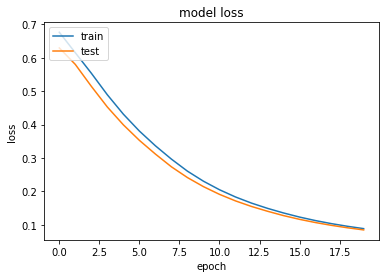

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

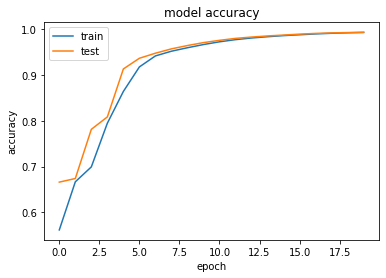

In [9]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Visualize model on a new sample

In [10]:
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [11]:
def create_3d_space(newInput, offset=0):
    _x, _y, _z = np.meshgrid(range(offset, offset+len(newInput)), range(len(newInput)), range(len(newInput)))
    _x = _x.flatten()
    _y = _y.flatten()
    _z = _z.flatten()

    _red, _green, _blue = np.meshgrid(np.zeros(len(newInput)), np.zeros(len(newInput)), np.zeros(len(newInput)))
    _red = _red.flatten()
    _green = _green.flatten()
    _blue = _blue.flatten()

    accepted = newInput.flatten()
    for idx, val in enumerate(accepted):
        if val == 2:
            _green[idx] = 65535
        if val == 0:
            _red[idx] = 65535

    return {
        "x": _x,
        "y": _y,
        "z": _z,
        "red": _red,
        "green": _green,
        "blue": _blue,
    }

In [12]:
def view_3d_space(input1, input2, space):
    pcd1 = o3d.geometry.PointCloud()
    pcd2 = o3d.geometry.PointCloud()
    
    space1 = create_3d_space(input1)
    space2 = create_3d_space(input2, space+5)

    pcd1.points = o3d.utility.Vector3dVector(np.vstack((space1["x"], space1["y"], space1["z"])).transpose())
    pcd1.colors = o3d.utility.Vector3dVector(np.vstack((space1["red"], space1["green"], space1["blue"])).transpose()/65535)
    pcd2.points = o3d.utility.Vector3dVector(np.vstack((space2["x"], space2["y"], space2["z"])).transpose())
    pcd2.colors = o3d.utility.Vector3dVector(np.vstack((space2["red"], space2["green"], space2["blue"])).transpose()/65535)

    voxel_grid1 = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd1, voxel_size=0.5)
    voxel_grid2 = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd2, voxel_size=0.5)

    o3d.visualization.draw_geometries([voxel_grid1, voxel_grid2])

In [13]:
newInput,newOutput = generate_samples(1, imgSize)
mewPrediction = model.predict(newInput).round().astype(int)

1/1 [==============================] - 1s 530ms/step


In [14]:
view_3d_space(newInput[0], newOutput[0], imgSize)

In [15]:
view_3d_space(newOutput[0], mewPrediction[0], imgSize)

### Test steps:
1. Create voxel with my actual points, represented in 1d
2. Reshape the array into 3 dimensions

In [ ]:
x = np.random.choice([0, 1], size=(imgSize*imgSize))
x

In [ ]:
x.shape